In [2]:
# Basic imports
import os
import pandas as pd
import numpy as np
import cv2
!pip install pytesseract
import pytesseract
import re
from tqdm import tqdm

# DATASET 1

## Pima Indians Diabetes Dataset

### Why we use this dataset

*   Contains pure numeric medical features
*   Helps understand how lab values relate to disease
*   Used later for ML-based health risk classification

### What information it gives

*   Glucose, BMI, insulin, age, BP → diabetes outcome


In [4]:
pima_path = "/content/drive/MyDrive/InfosysSpringboard-Project-Dataset-Final/diabetes.csv"
pima_df = pd.read_csv(pima_path)

pima_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima_df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# DATASET 2

## Diet Recommendations Dataset

### Why we use this dataset

*   Direct mapping: health profile → diet type
*   Contains diseases, severity, allergies, preferences
*   Will be used later as ground truth for diet generation

### What information it gives

*   Patient lifestyle + medical conditions
*   Target diet recommendation (Low-Carb, Low-Sodium, Balanced)




In [7]:
diet_path = "/content/drive/MyDrive/InfosysSpringboard-Project-Dataset-Final/diet_recommendations_dataset.csv"
diet_df = pd.read_csv(diet_path)

diet_df.head()


,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [13]:
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        1000 non-null   object 
 1   Age                               1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Weight_kg                         1000 non-null   float64
 4   Height_cm                         1000 non-null   int64  
 5   BMI                               1000 non-null   float64
 6   Disease_Type                      796 non-null    object 
 7   Severity                          1000 non-null   object 
 8   Physical_Activity_Level           1000 non-null   object 
 9   Daily_Caloric_Intake              1000 non-null   int64  
 10  Cholesterol_mg/dL                 1000 non-null   float64
 11  Blood_Pressure_mmHg               1000 non-null   int64  
 12  Glucose

In [8]:
diet_df[['Disease_Type','Diet_Recommendation']].value_counts()


,,count
Disease_Type,Diet_Recommendation,
Hypertension,Low_Sodium,316
Diabetes,Low_Carb,258
Obesity,Balanced,222


# DATASET 3

## Food Nutrition Dataset (5 CSV files)

### Why we use this dataset

*   Core nutrition intelligence
*   Contains macro + micro nutrients
*   Enables disease-specific diet planning

### What information it gives

*   Calories, carbs, fats, protein
*   Sodium & cholesterol (critical for BP/heart)
*   Vitamins & minerals




In [9]:
food_folder = "/content/drive/MyDrive/InfosysSpringboard-Project-Dataset-Final/food_nutrition"

food_files = [f for f in os.listdir(food_folder) if f.endswith(".csv")]

food_dfs = []
for file in food_files:
    df = pd.read_csv(os.path.join(food_folder, file))
    food_dfs.append(df)

food_df = pd.concat(food_dfs, ignore_index=True)

food_df.head()


,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,nectarine,66,0.500,0.066,0.100,0.200,15.8,11.8,...,0.081,9.000,0.100,0.4,13.500,0.002,39.0,301.500,0.000,20.735
1,1,1,kiwifruit gold,51,0.200,0.008,0.099,0.051,12.8,10.0,...,13.800,0.100,0.200,9.7,0.072,20.300,255.2,0.003,0.077,159.686
2,2,2,prickly pear raw,8,0.072,0.000,0.000,0.000,1.9,0.2,...,34.200,0.051,0.021,13.1,0.100,2.100,24.7,0.023,0.073,39.263
3,3,3,pineapple,45,0.100,0.074,0.001,0.087,11.8,8.9,...,0.061,11.700,0.091,0.3,10.800,0.800,7.2,98.100,0.061,13.970
4,4,4,rowan,253,4.600,0.600,0.000,0.000,54.5,32.1,...,34.200,2.400,5.000,73.0,0.400,118.600,298.7,0.000,1.000,176.400


In [10]:
food_df.shape


(2395, 37)

In [11]:
food_df.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'food', 'Caloric Value', 'Fat',
       'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats',
       'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol',
       'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11',
       'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6',
       'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
       'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium',
       'Zinc', 'Nutrition Density'],
      dtype='object')

In [12]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2395 non-null   int64  
 1   Unnamed: 0            2395 non-null   int64  
 2   food                  2395 non-null   object 
 3   Caloric Value         2395 non-null   int64  
 4   Fat                   2395 non-null   float64
 5   Saturated Fats        2395 non-null   float64
 6   Monounsaturated Fats  2395 non-null   float64
 7   Polyunsaturated Fats  2395 non-null   float64
 8   Carbohydrates         2395 non-null   float64
 9   Sugars                2395 non-null   float64
 10  Protein               2395 non-null   float64
 11  Dietary Fiber         2395 non-null   float64
 12  Cholesterol           2395 non-null   float64
 13  Sodium                2395 non-null   float64
 14  Water                 2395 non-null   float64
 15  Vitamin A            

# DATASET 4

## Medical Lab Report Images



In [14]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 26.2 MB/s eta 0:00:00


In [15]:
import easyocr
import cv2
import pandas as pd
import re


In [16]:
reader = easyocr.Reader(['en'], gpu=False)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [20]:
image_path = "/content/drive/MyDrive/InfosysSpringboard-Project-Dataset-Final/medical_reports_images/AHD-0425-PA-0007719_E-REPORTS_250427_2032@E.pdf_page_7.png"

img = cv2.imread(image_path)


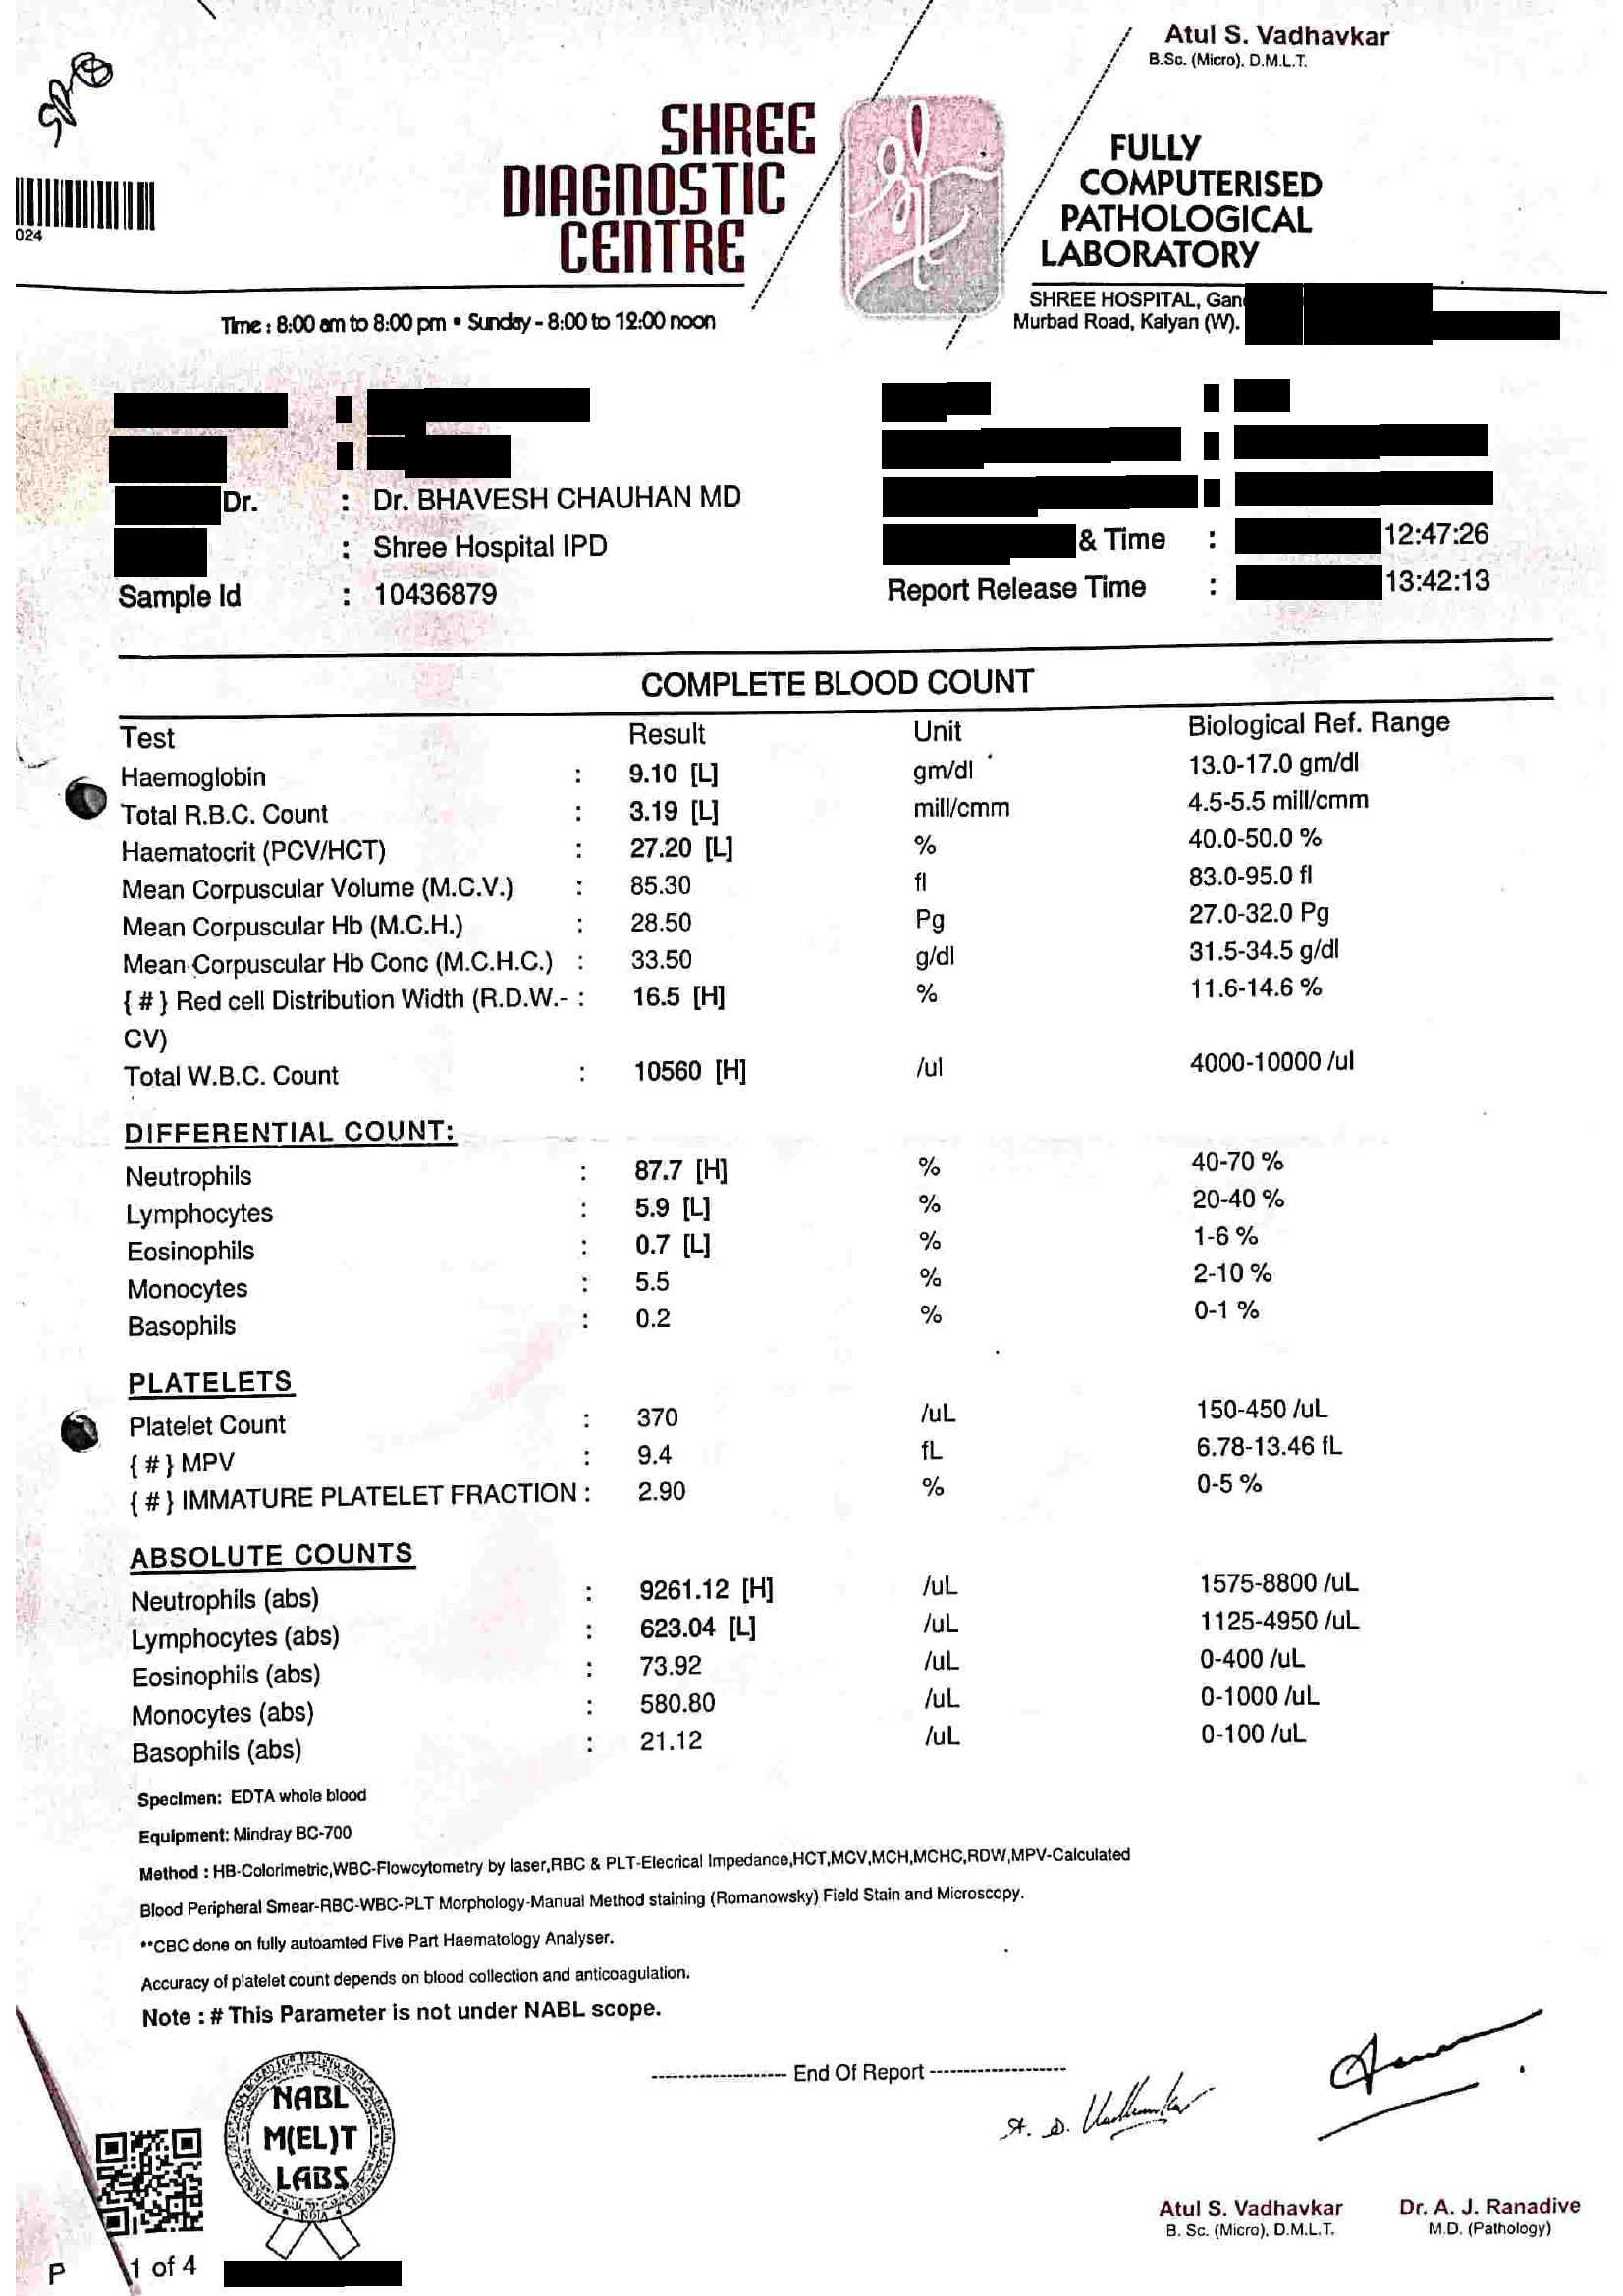

In [21]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread(image_path))

In [26]:
# Initialize OCR reader
reader = easyocr.Reader(['en'])
# Perform OCR (best practice: pass image path)
results = reader.readtext(image_path)

print("Extracted Text:\n")
for bbox, text, confidence in results:
    print(f"{text} (Confidence: {confidence:.2f})")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Extracted Text:

Atul S. Vadhavkar (Confidence: 0.75)
B.Sc (Micro) DMLT (Confidence: 0.74)
SHRGE (Confidence: 0.51)
FULLY (Confidence: 1.00)
diAgnostIC (Confidence: 0.17)
COMPUTERISED (Confidence: 1.00)
PATHOLOGICAL (Confidence: 1.00)
024 (Confidence: 1.00)
CGnTRE (Confidence: 0.64)
LABORATORY (Confidence: 0.69)
SHREE HOSPITAL, Gan (Confidence: 0.68)
Tme : (Confidence: 0.41)
BO&n t 800pm (Confidence: 0.15)
sundy- 8,00 t 120nn (Confidence: 0.55)
Murbad Road; Kalyan (W): (Confidence: 0.75)
Dr_ (Confidence: 0.97)
Dr. BHAVESH CHAUHAN MD (Confidence: 0.83)
Shree Hospital IPD (Confidence: 1.00)
Time (Confidence: 0.99)
12*47.26 (Confidence: 0.66)
Sample Id (Confidence: 0.99)
10436879 (Confidence: 0.98)
Report Release Time (Confidence: 0.80)
13.42:13 (Confidence: 0.49)
COMPLETE BLOOD COUNT (Confidence: 0.96)
Test (Confidence: 1.00)
Result (Confidence: 1.00)
Unit (Confidence: 1.00)
Biological Ref. Range (Confidence: 0.90)
Haemoglobin (Confidence: 1.00)
9.10 [L] (Confidence: 0.93)
13.0-17.0 (Con